In [2]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import pie_chart, likert

In [3]:
# get formatted and ready to use dataframe
df = get_df()

In [4]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [5]:
df['Q6_ML_Solution_Optimality'].unique()

array(['Frequently', 'Never', 'Sometimes', 'Rarely', "I don't know",
       'Always', '-77'], dtype=object)

In [6]:
# total answers of each label
df['Q6_ML_Solution_Optimality'].value_counts()


Frequently      76
-77             70
Sometimes       62
Never           28
I don't know    17
Rarely          14
Always           9
Name: Q6_ML_Solution_Optimality, dtype: int64

In [7]:
# mapping of old labels to new one
q6_rename_mapping = {
    'Never': 'Never',
    'Rarely': 'Rarely',
    'Sometimes': 'Sometimes',
    'Frequently': 'Frequently',
    'Always': 'Always',
    "I don't know": "I don't know",
}

In [8]:
# labels of our pie chart
remove_value(df,'-77','Q6_ML_Solution_Optimality')
remove_value(df,'I don\'t know','Q6_ML_Solution_Optimality')
labels = list(df['Q6_ML_Solution_Optimality'].value_counts().index)
labels[1],labels[4] = labels[4], labels[1]
print(labels)
# total answers of each label
values = list(df['Q6_ML_Solution_Optimality'].value_counts())
values[1],values[4] = values[4], values[1]
print(values)

['Frequently', 'Always', 'Never', 'Rarely', 'Sometimes']
[76, 9, 28, 14, 62]


In [9]:
# normalize to the sum become 100
sum_values = sum(values)
normalized_values = [(float(v)/sum_values)* 100 for v in values]

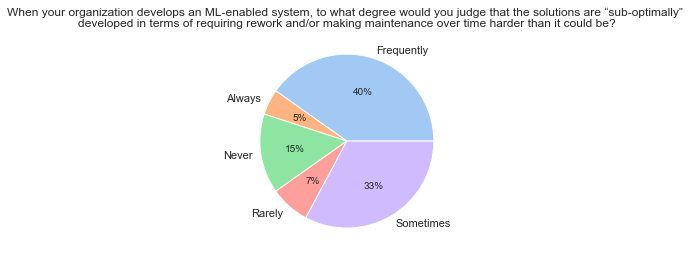

In [10]:
pie_chart(normalized_values, rename_values(q6_rename_mapping, labels), 
          title="When your organization develops an ML-enabled system, to what degree would you judge that the solutions are “sub-optimally” \ndeveloped in terms of requiring rework and/or making maintenance over time harder than it could be?")

In [11]:
#print(labels)
# substitute position of labels to keep an order from lower to higher
labels[2], labels[4] = labels[4], labels[2]
labels[0], labels[1], labels[3], labels[4] = labels[1], labels[0], labels[4], labels[3]
# print(labels)

In [12]:
q6_df = pd.DataFrame({'Solution Optimality':df['Q6_ML_Solution_Optimality']})

In [13]:
# remove 'I don't know' and not answered options
q6_df = q6_df[q6_df['Solution Optimality'] != "I don't know"]
q6_df = q6_df[q6_df['Solution Optimality'] != '-77']

In [14]:
q6_df

,Solution Optimality
2,Frequently
3,Never
4,Sometimes
5,Sometimes
6,Sometimes
...,...
265,Frequently
266,Rarely
269,Never
272,Never


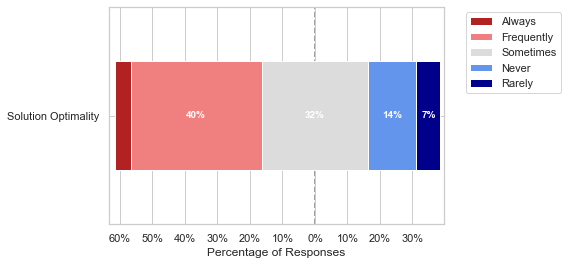

In [13]:
likert(q6_df, labels, use_percentage=True, bar_label=True)

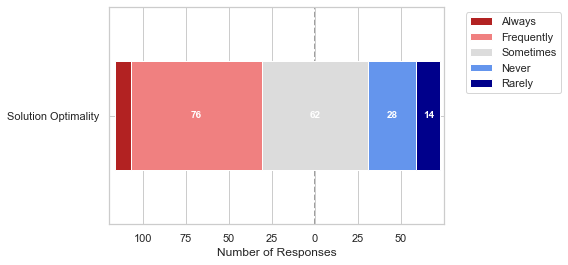

In [14]:
likert(q6_df, labels, use_percentage=False, bar_label=True)